# General explanation
Building neural networks with TensorFlow, without Keras for MNIST data.
MNIST contains 55000 images of digit 0...9. The task is to build a model that predict digit for a given image.
Each image in MNIST is 28x28x1 mean 28 pixels width, 28 pixels heigh and 1 color channel, - gray

# Load and see some examples

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

/home/hung/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
print("MNIST object overview:\n", mnist)
print('='*50)
print("Train set shape:\n", mnist.train.images.shape)
print('='*50)
print("Test set shape:\n", mnist.test.images.shape)

MNIST object overview:
 Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fef05158940>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7feed176f400>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7feed176f860>)
Train set shape:
 (55000, 784)
Test set shape:
 (10000, 784)


### Samples

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

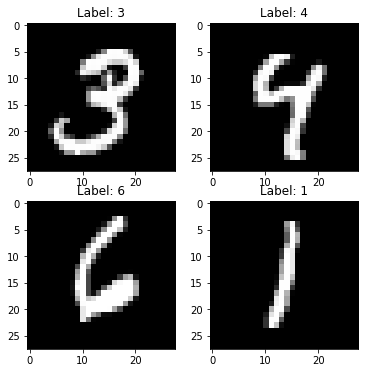

In [4]:
sample_indices = [1,2,3,4]
train_samples = mnist.train.images[sample_indices]
labes_samples = mnist.train.labels[sample_indices]
plt.figure(figsize=[6,6])
for i in range(len(sample_indices)):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%labes_samples[i].argmax(axis=-1))
    plt.imshow(train_samples[i].reshape([28,28]), cmap='gray')

# MultiLayer Perceptron
## Architexture

- 1. Input [batch, 724 = 28x28], **x** <br>
- 2.1. Linear summator 1, 200 units, **Z1**
- 2.2. Activator 1, ReLU/sigmoid, **A1** <br>
- 3.1. Linear summator 2, 100 units, **Z2**
- 3.2. Activator 2, ReLU/sigmoid, **A2** <br>
- 4.1. Linear summator 3, 10 units, **Z3** 
- 4.2. Activator 3, ReLU/sigmoid, **A3**
- 5. softmax


In [3]:
# setup environment
import tensorflow as tf
sess = tf.InteractiveSession()

In [52]:
import math

In [73]:
# BUILD MODEL
# build computational graph
# ============================================================

# input layer
x = tf.placeholder(tf.float32, shape=[None, 784])
# None means we do not define how many batch size
# ============================================================

# Weight and bias matrices for fist summator with 200 units
W12 = tf.Variable(tf.random_normal(shape=[784, 200]))
b1 = tf.Variable(tf.zeros([200]))

# initialize variables for W12 & b1
sess.run(tf.global_variables_initializer())

# first summator
Z1 = tf.matmul(x, W12) + b1

# First activator with sigmoid function
A1 = tf.nn.sigmoid(Z1)

# ============================================================
# Weight and bias matrices for second summator with 100 units
W23 = tf.Variable(tf.random_normal(shape=[200, 100]))
b2 = tf.Variable(tf.zeros([100]))

# initialize variables for W23 & b2
sess.run(tf.global_variables_initializer())

# second summator
Z2 = tf.matmul(A1, W23) + b2

# secon activator with sigmoid function
A2 = tf.nn.sigmoid(Z2)

# ============================================================
# Weight and bias matrices for third summator with 10 units
W34 = tf.Variable(tf.zeros(shape=[100, 10]))
b3 = tf.Variable(tf.zeros([10]))

# initialize variables for W34 & b3
sess.run(tf.global_variables_initializer())

# third summator
Z3 = tf.matmul(A2, W34) + b3

# third activator with sigmoid function
A3 = tf.nn.sigmoid(Z3)
# ============================================================
# labels
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [74]:
# cost function
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=A3)
)

# model training aim is minimize cost function by mini-batch gradient descent
train_step = tf.train.GradientDescentOptimizer(0.1)\
                     .minimize(cross_entropy)

In [75]:
# run the training - computational graph
for _ in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [76]:
# Evaluate the Model
correct_prediction = tf.equal(tf.argmax(A3,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
# was 0.9189

0.7092


In [77]:
print(accuracy.eval(feed_dict={x: mnist.train.images, y_: mnist.train.labels}))

0.7041091


## MLP: Input + output

In [8]:
# BUILD MODEL
# build computational graph
# ============================================================

# input layer
x = tf.placeholder(tf.float32, shape=[None, 784])
# None means we do not define how many batch size
# ============================================================

# Weight and bias matrices for fist summator with 200 units
W12 = tf.Variable(tf.zeros(shape=[784, 10]))
b1 = tf.Variable(tf.zeros([10]))

# initialize variables for W12 & b1
sess.run(tf.global_variables_initializer())

# first summator
Z1 = tf.matmul(x, W12) + b1

# First activator with sigmoid function
# A1 = tf.nn.sigmoid(Z1)

# ============================================================
# labels
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [9]:
# cost function
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=Z1)
)

# model training aim is minimize cost function by mini-batch gradient descent
train_step = tf.train.GradientDescentOptimizer(0.5)\
                     .minimize(cross_entropy)
    
# run the training - computational graph
for _ in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

# Evaluate the Model
correct_prediction = tf.equal(tf.argmax(Z1,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Train accuracy
print("Train accuracy:", accuracy.eval(feed_dict={x: mnist.train.images, y_: mnist.train.labels}))

# Test accuracy
print("Test accuracy:", accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Train accuracy: 0.9151273
Test accuracy: 0.9141


## Why ANN with Numpy can obtain accuracy 98%, but MLP with TF can't?

# Convolutional neural network
**Restart kernel to continue**

### Load data and prepapre environment

In [1]:
from __future__ import print_function

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

import tensorflow as tf

/home/hung/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# Functions definition

def weight_variable(shape):
    # initiate weight matrix, size = shape
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    # initiate bias vector, size = shape
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    # convolutional function
    # input layer x
    # kernel weight matrix X
    # strides=[1, 1, 1, 1]: move 1 (first) step by bacth, 
    # 1 (second + third) step by feature map width & height
    # 1 step by filters
    # padding
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    # poolfunction
    # input layer x
    # kernel size & strides =[1, 2, 2, 1]: 1 along batch, 2&2: along width&height, 1 along filters
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

## CNN computational graph

In [3]:
# Input layer
x  = tf.placeholder(tf.float32, [None, 784], name='x')
x_image = tf.reshape(x, [-1, 28, 28, 1])
# image 28x28
#-----------------------------------------------------

# Convolutional layer 1
W_conv1 = weight_variable([3, 3, 1, 8])
b_conv1 = bias_variable([8])
# feature map 28x28x8

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
# feature map 14x14x8

#-----------------------------------------------------
# Convolutional layer 2
W_conv2 = weight_variable([3, 3, 8, 16])
b_conv2 = bias_variable([16])
# feature map 14x14x16

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
# feature map 7x7x16

#-----------------------------------------------------
# Fully connected layer 1, 128 units, 7x7x16 inputs
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*16])

W_fc1 = weight_variable([7 * 7 * 16, 128])
b_fc1 = bias_variable([128])

h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
keep_prob  = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#-----------------------------------------------------
# Fully connected layer 2 (Output layer), 10 units, 128 inputs
W_fc2 = weight_variable([128, 10])
b_fc2 = bias_variable([10])

y = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2, name='y')

#-----------------------------------------------------
# label
y_ = tf.placeholder(tf.float32, [None, 10],  name='y_')

## Evaluation algorithm

In [4]:
# Evaluation functions
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

# Training algorithm
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [5]:
# Training steps
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    
    max_steps = 2000
    for step in range(max_steps):
        batch_xs, batch_ys = mnist.train.next_batch(32)
        if (step % 100) == 0:
            print(step, sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
    print(max_steps, sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0 0.0975
100 0.147
200 0.3775
300 0.5625
400 0.6063
500 0.6932
600 0.7427
700 0.7846
800 0.8151
900 0.84
1000 0.8588
1100 0.8669
1200 0.8772
1300 0.8821
1400 0.886
1500 0.8964
1600 0.8973
1700 0.903
1800 0.9074
1900 0.9126
2000 0.9105


In [ ]:
# train accuracy
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    print(max_steps, sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))